# <span style='color :steelblue' >--:Project On Recommendation System:--</span>

# DOMAIN: Smartphone, Electronics

## CONTEXT: 
- India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

## DATA DESCRIPTION: 
- author : name of the person who gave the rating
- country : country the person who gave the rating belongs to
- data : date of the rating
- domain: website from which the rating was taken from
- extract: rating content
- language: language in which the rating was given
- product: name of the product/mobile phone for which the rating was given
- score: average rating for the phone
- score_max: highest rating given for the phone
- source: source from where the rating was taken

## PROJECT OBJECTIVE: 
- Build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

# <span style='color :steelblue' >1. Import and warehouse data:</span>

## <span style='color :steelblue' >Load the necessary libraries</span>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import required libraries
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib as joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline


## <span style='color :steelblue' >Import all the given datasets</span>

In [2]:
data1 = pd.read_csv('./phone_user_review_file_1.csv', encoding = "latin-1") 
data2 = pd.read_csv('./phone_user_review_file_2.csv', encoding = "latin-1")
data3 = pd.read_csv('./phone_user_review_file_3.csv', encoding = "latin-1")
data4 = pd.read_csv('./phone_user_review_file_4.csv', encoding = "latin-1")
data5 = pd.read_csv('./phone_user_review_file_5.csv', encoding = "latin-1")
data6 = pd.read_csv('./phone_user_review_file_6.csv', encoding = "latin-1")

In [3]:
print('data1:', data1.shape)
data1.head()

data1: (374910, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
print('data2:', data2.shape)
data2.head()

data2: (114925, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
print('data3:', data3.shape)
data3.head()

data3: (312961, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [6]:
print('data4:', data4.shape)
data4.head()

data4: (98284, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [7]:
print('data5:', data5.shape)
data5.head()

data5: (350216, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [8]:
print('data6:', data6.shape)
data6.head()

data6: (163837, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


## <span style='color :steelblue' >Merge all datasets into one</span>

In [9]:
smartphone_df=pd.concat([data1,data2,data3,data4,data5,data6])
smartphone_df_origin=smartphone_df.copy()

In [10]:
display(smartphone_df.head(),smartphone_df.shape)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


(1415133, 11)

**Observation**
- **After merge the total number of columns=11 and rows=1415133**

## <span style='color :steelblue'>Check a few observations and shape of the data-frame.</span>

In [13]:
# function to get dataoverview  which will display Number of Rows, Number of features,features, missing values, unique values
def dataoveriew(df,message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nAny Null values:", df.isnull().any())
    print("\nChecking for NAN:\n",df.isna().sum())

In [14]:
display(dataoveriew(smartphone_df,'Checking DataOverview'))

Checking DataOverview:

Rows: 1415133

Number of features: 11

Missing values: 209542

Any Null values: phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score         True
score_max     True
extract       True
author        True
product       True
dtype: bool

Checking for NAN:
 phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


None

**Obseravtion**
- **As per above there are 209542 Missing values**
- **Columns  score, score_max,extract, author and product have missing values**


## <span style='color :steelblue'>Round off scores to the nearest integers</span>

In [15]:
#Round oﬀ scores to the nearest integers. 
smartphone_df['score'] = round(smartphone_df['score']) 
smartphone_df['score_max'] = round(smartphone_df['score_max'])

## <span style='color :steelblue'>Impute the missing values if there is any</span>

In [16]:
# Filling the null values in column 'score' and 'score_max' , 'extract' ,'author' and 'product'
smartphone_df = smartphone_df.fillna(smartphone_df.median())

# dropping the null values in columns 
smartphone_df = smartphone_df.dropna()

In [17]:
#Reverify Null and Missing values after treating
display(dataoveriew(smartphone_df,'Checking DataOverview'))

Checking DataOverview:

Rows: 1336416

Number of features: 11

Missing values: 0

Any Null values: phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score        False
score_max    False
extract      False
author       False
product      False
dtype: bool

Checking for NAN:
 phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64


None

**Obseravtion**
- **After Imputing values for null and treating Missing values , now there are No Null and Missing Values in the dataset**


 ## <span style='color :steelblue'>Check for duplicate values and remove them if there is any</span>

In [18]:
#Checking Duplicates
print('Duplicated rows: ', smartphone_df[smartphone_df.duplicated()].shape[0])

Duplicated rows:  4823


In [19]:
#Dropping Duplicate
smartphone_df = smartphone_df.drop_duplicates()

In [20]:
#RE-Checking Duplicates
print('Duplicated rows: ', smartphone_df[smartphone_df.duplicated()].shape[0])

Duplicated rows:  0


**Obseravtion**
- **Earlier Data set was having Duplicate data - 4809 , now there are No duplicate values in the dataset**

 ## <span style='color :steelblue'>Keep only 1000000 data samples. Use random state=612</span>

In [21]:
sm_df = smartphone_df.sample(n=1000000, random_state=612)
sm_df.shape

(1000000, 11)

 ## <span style='color :steelblue'>Drop irrelevant features. Keep features like Author, Product, and Score</span>

In [22]:
sm_df.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)
sm_df.head()

,score,author,product
8765,10.0,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
145859,10.0,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB
302180,8.0,katha_maria93,Sony Ericsson W395 blush titanium Handy
304586,2.0,paul george,Apple iPhone 3G 8GB SIM-Free - Black


**Obseravtion**
- **We have dropped other columns and have kept only author , product and score for out recommendation analysis**

## <span style='color :steelblue'>2. Answer the following questions</span>
### <span style='color :steelblue'>• Identify the most rated features.</span>

In [23]:
# Identify the most rated features.
sm_df.groupby('product')['score'].mean().sort_values(ascending=False).head(10) 

product
Motorola U9 PEBL Pink Mobile Phone Unlocked Sim Free                                                                                                                           10.0
Motorola Moto X - Smartphone libre Android (pantalla 5.2", cÃ¡mara 13 Mp, 32 GB, 2 GB RAM), marrÃ³n (importado)                                                                10.0
Sony Xperia T2 Ultra Dual D5322 (White)                                                                                                                                        10.0
Motorola Moto X 2. Generation Smartphone (13,2 cm (5,2 Zoll) Full HD-Display, 13 Megapixel Kamera, Quad-Core Prozessor, 32GB interner Speicher, Android KitKat 4.4.4) weiÃ    10.0
DOOGEE T6 Pro Smartphone 5.5'' 4G Android 6.0 Octa Core 6250mAh di Grande Capienza della Batteria Fast Charge Dual SIM 1.5GHZ 3GB RAM 32GB 13.0MP                              10.0
DOOGEE T6 Pro Smartphone, Mobile Phone with 6250mAh battery - 13MP+5MP Camera - 5.5 inch HD 

- **Sorted the data based on the higher score in desending order.**

### <span style='color :steelblue'>• Identify the users with most number of reviews.</span>

In [24]:
#  Identify the users with most number of reviews. 
most_rated = sm_df.groupby('author').size().sort_values(ascending=False)[:10]
most_rated

author
Amazon Customer    57801
Cliente Amazon     14656
e-bit               6260
Client d'Amazon     5715
Amazon Kunde        3563
Anonymous           1968
einer Kundin        1953
einem Kunden        1432
unknown             1283
Anonymous           1096
dtype: int64

**Obseravtion**
- **From above details , Amazon Customer is the author with most number reviews**

### <span style='color :steelblue'>• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset</span>

In [25]:
# Select the data with users who have given more than 50 ratings. Report the shape of the final datase
final_df1 = pd.DataFrame(columns=['author', 'author_count'])
final_df1['author']=sm_df['author'].value_counts().index.tolist() 
final_df1['author_count'] = list(sm_df['author'].value_counts() > 50)
final_df1

,author,author_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
620117,chino1226,False
620118,SUJIT DEBNATH,False
620119,Giuseppe Di Lecce,False
620120,bm83,False


In [26]:
# get names of indexes for which count column value is False
index_names = final_df1[ final_df1['author_count'] == False ].index 

# drop these row indexes from dataFrame 
final_df1.drop(index_names, inplace = True) 
final_df1

,author,author_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
685,Cindy,True
686,Alain,True
687,Johan,True
688,Jean,True


In [27]:
# Select the data with products having more than 50 ratings. Report the shape of the final datase
final_df2 = pd.DataFrame(columns=['product', 'product_count'])
final_df2['product']=sm_df['product'].value_counts().index.tolist() 
final_df2['product_count'] = list(sm_df['product'].value_counts() > 50)
final_df2

,product,product_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
55904,Samsung Galaxy Note 3 - Smartphone libre Andro...,False
55905,Smartphone Asus ZenFone 3 Zoom 128GB,False
55906,Huawei P8 GRA-L09-4G - Smartphone Movistar DÃ©...,False
55907,Samsung Galaxy S III Mini GT-I8190,False


In [28]:
# get names of indexes for which count column value is False
index_names = final_df2[ final_df2['product_count'] == False ].index 

# drop these row indexes from dataFrame 
final_df2.drop(index_names, inplace = True) 
final_df2

,product,product_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4371,Apple iPhone 4 32GB (White) - Verizon,True
4372,Samsung Galaxy A9 Pro (Gold),True
4373,Nokia 6230i Cep Telefonu (GRÄ°),True
4374,Samsung Galaxy S6 Edge 32GB G925F Black,True


In [29]:
# selecting data rows where product is having more than 50 ratings.  
final_df3 = sm_df[sm_df['product'].isin(final_df2['product'])] 
final_df3

,score,author,product
8765,10.0,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
28860,10.0,stephensca,Samsung Galaxy S7 32GB (Verizon)
183941,8.0,martinsa,Sony Xperia Z C6603
197969,10.0,MoneyMike,Samsung Galaxy S4 16GB (T-Mobile)
...,...,...,...
97624,9.0,R2D2bro,Samsung Galaxy S6 32GB (AT&T)
237294,4.0,RACHITO2006,Nokia 5800
351525,10.0,irene,"Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero..."
260069,10.0,anaid96,Sony Ericsson Aino


In [30]:
# selecting data rows where author is having more than 50 ratings.  
final_df4 = final_df3[final_df3['author'].isin(final_df1['author'])] 
final_df4

,score,author,product
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
47652,2.0,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)"
28936,10.0,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
353663,8.0,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...
224123,8.0,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)"
...,...,...,...
177801,10.0,Cliente Amazon,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D..."
15640,10.0,Amazon Customer,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...
269554,9.0,Capyto,Samsung M150 Cep Telefonu
87176,6.0,Gustavo,Huawei Ascend Y330 - Smartphone libre Android ...


In [31]:
#Making Final Dataframe
final_df=final_df4
final_df.head()

,score,author,product
233365,10.0,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
47652,2.0,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)"
28936,10.0,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di..."
353663,8.0,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...
224123,8.0,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)"


**Obseravtion**
- **The above data shows the product names having more than 50 ratings**
- **This data base have 108809 rows and 3 columns**

### <span style='color :steelblue'>5 point summary of numerical attributes.</span>

In [32]:
display(final_df[['score']].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
score,109237.0,7.852403,2.789687,1.0,6.0,9.0,10.0,10.0


**Obseravtion**
- **This is can be considered as categorical attribute with values of (1,2,3,4,5..10).**
- **The mean rating is 7.86  which means most of the users have given very good ratings for the products i.e. many records with ratings above 6.**
- **This can be seen from the median (Q2), 75% (Q3) and max values as 5. Even 25% (Q1) value is 6.0.**

## <span style='color :steelblue'>3. Build a popularity based model and recommend top 5 mobile phones.</span>

In [33]:
#calculating the mean score for a product by grouping it.
ratings_mean_count = pd.DataFrame(final_df.groupby('product')['score'].mean())

# calculating the number of ratings a product got
ratings_mean_count['rating_counts'] = pd.DataFrame(final_df.groupby('product')['score'].count()) 

# Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 
ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,56
Samsung Galaxy S7 Edge 32Gb,10.0,13
Sim Free Apple iPhone SE 64GB Mobile Phone - Space Grey,10.0,12
Sony Smartphone Sony Xperia L Preto Android 4.1 3G CÃ¢mera 8MP 8GB NFC,10.0,12
BlackBerry OEM Z10 Black Leather Swivel Holster,10.0,9


2338

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

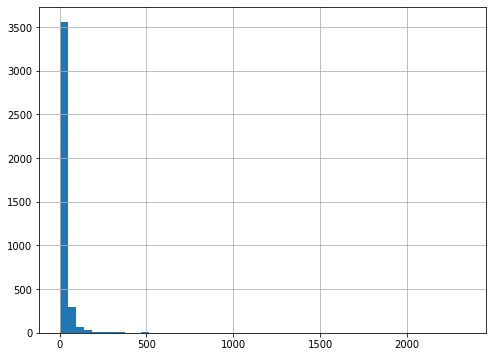

In [34]:
ratings_mean_count['rating_counts'].max()
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=50)

**Observations**
- **This is a ratings count distribution grouped by all the Products. For the plot perspective, I have clipped the upper limit to 30 which means any value above 30 will be set to it.**

- **As it can been seen from the plot, there are few  products which were rated only once i.e. only one user have rated. And then the count decreases.**

In [35]:
#calculating the mean score for a author by grouping it.
authorratings_mean_count = pd.DataFrame(final_df.groupby('author')['score'].mean())
authorratings_mean_count['rating_counts'] = pd.DataFrame(final_df.groupby('author')['score'].count()) 
authorratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
author,,
rick2809,10.000000,24
91mobiles Customer,10.000000,2
miguel,9.652174,23
schreef,9.609756,41
gabberino93,9.583333,24


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

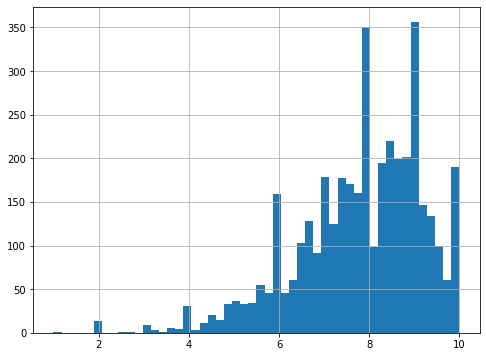

In [36]:
plt.figure(figsize=(8,6))
ratings_mean_count['score'].hist(bins=50)

**Observations**
- **This is a mean rating distribution grouped by all the Products.**

- **As it can been seen from the plot, there are many products which were given a Rating between  6 and  10 . Hence the plot shows lot of bins between 6 and 10.**

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

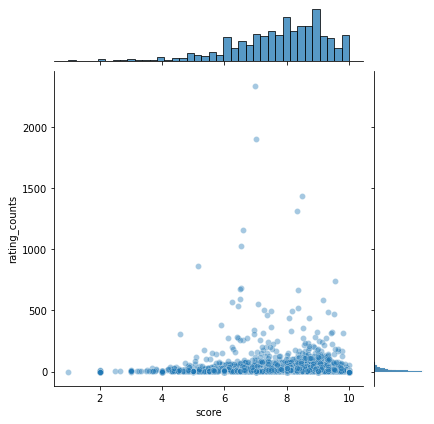

In [37]:
plt.figure(figsize=(8,6))
sns.jointplot(x='score', y='rating_counts', data=ratings_mean_count, alpha=0.4)

**Observations**
- **This is a joint plot between Mean rating distribution and Score Count grouped by all the Products. As shown in the plot, data is clustered between mean rating of 6 to 10.**

**Popularity Based Observations**
- **Foom above obervation of Popularity Based Model below are 5 most popular Products with score 10**
- **Samsung Galaxy Note5,Samsung Galaxy S7 Edge 32Gb,Sim Free Apple iPhone SE 64GB Mobile Phone - Space Grey,HTC One (32Gb),Samsung Galaxy S III, Purple 16GB (Sprint)**

## <span style='color :steelblue'>4. Build a collaborative filtering model</span>


In [38]:
#You can use SVD from surprise or build it from scratch
#(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues).
#Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model

In [39]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [40]:
class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None
        

    def fit_and_predict(self):        
        print('**Fitting the train data...**')
        self.model.fit(self.trainset)       

        print('**Predicting the test data...**')
        self.pred_test = self.model.test(self.testset)        
        rmse = round(accuracy.rmse(self.pred_test), 3)
        print('**RMSE for the predicted result is ' + str(rmse) + '**')   
        
        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns=['author', 'product', 'score'])
        for item in self.top_n:
            subdf = pd.DataFrame(self.top_n[item], columns=['author', 'product'])
            subdf['author'] = item
            cols = subdf.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            subdf = subdf[cols]        
            self.recommenddf = pd.concat([self.recommenddf, subdf], axis = 0)        
        return rmse
        
    def cross_validate(self):
        print('**Cross Validating the data...**')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        print('**Mean CV RMSE is ' + str(cv_result)  + '**')
        return cv_result



In [41]:

     def recommend(datam,user_id, n):
        #print('**Recommending top ' + str(n)+ ' products for author : ' + user_id + ' ...**') 
        df = datam[datam['author'] == user_id].head(n)
        subdf = df[['author', 'product', 'score']].sort_values('score', ascending=[False])
        display(subdf)
        return  subdf   

In [42]:
# Keep only 5000 data samples. Use random state=612
sp_data = smartphone_df.sample(n=5000, random_state=612)
sp_data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
8765,/cellphones/samsung-galaxy-s7-edge/,5/23/2016,en,us,Samsung,samsung.com,10.0,10.0,I love this phone. Very fast no problems since...,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
233365,/cellphones/asus-zenfone-2-ze551ml/,2/20/2017,it,it,Amazon,amazon.it,10.0,10.0,"QualitÃ prezzo davvero ottimo, rispetto ai pi...",Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
145859,/cellphones/huawei-mate-s/,1/14/2017,he,il,Zap.il,zap.co.il,10.0,10.0,×§× ××ª× ××ª ××××©××¨ ×1500 ×©:× ××...,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB
302180,/cellphones/sony-ericsson-w395/,5/28/2009,de,de,Amazon,amazon.de,8.0,10.0,Ich habe dieses Handy am 30.3. bei amazon erwo...,katha_maria93,Sony Ericsson W395 blush titanium Handy
304586,/cellphones/apple-iphone-3g/,2/6/2009,en,gb,Amazon,amazon.co.uk,2.0,10.0,There not unock t to any network and not engli...,paul george,Apple iPhone 3G 8GB SIM-Free - Black


In [43]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection.validation import cross_validate

In [44]:
reader = Reader(rating_scale=(1,11))
data = Dataset.load_from_df(sp_data[[ 'product', 'author', 'score']],reader)
trainset, testset = train_test_split(data, test_size=.15)

### <span style='color :steelblue'>Collaberative filtering model using SVD</span>

**SVD - Model Based Collaborative Filtering**



In [45]:
from surprise import SVD
algo = SVD()

In [46]:
col_fil_svd = collab_filtering_based_recommender_model(algo, trainset, testset, data)

In [47]:
svd_rmse = col_fil_svd.fit_and_predict()

**Fitting the train data...**
**Predicting the test data...**
RMSE: 2.5860
**RMSE for the predicted result is 2.586**


### <span style='color :steelblue'>Item based Collaberative filtering model using KNN With KMeans</span>


In [48]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
itemalgo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
itemalgo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [49]:
# run the trained model against the testset
testitem_pred = itemalgo.test(testset)

### Displaying 10 items from prediction List

In [50]:
#Displaying 10 items from prediction List
testitem_pred[0:10]

[Prediction(uid='Sony Ericsson Vivaz pro U8i', iid='X-Steals', r_ui=6.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Smartphone Motorola Moto G 4 Play XT1603', iid='e-bit', r_ui=10.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Nokia 701', iid='???????\x80??.', r_ui=10.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Nokia Lumia 928 32GB Unlocked GSM 4G LTE Windows Smartphone w/ 8MP Carl Zeiss Optics Camera - Black', iid='J.E.', r_ui=4.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Asus Zenfone 2 Laser (ZE500KL) - Smartphone Android de 5", (cÃ¡mara de 13 MP, 16 GB, Quad-Core 1.2 GHz, 2 GB RAM, dual SIM), rojo', iid='jafuentes', r_ui=10.0, est=7.999764705882353, details={'was_impossible': True, 'reason

### Evaluate  RMSE for Item based model

In [51]:
# Evaluate the collaborative model. Print RMSE value
col_fil_item = collab_filtering_based_recommender_model(algo, trainset, testset, data)

print("Item-based Model : Test Set")
accuracy.rmse(testitem_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.6117


2.611676273579513

In [52]:
##cross validation to find best score
item_cv_rmse = col_fil_item.cross_validate()

from surprise.model_selection import cross_validate
cross_validate(itemalgo,data, measures=['RMSE'], cv=3, verbose=False)

**Cross Validating the data...**
**Mean CV RMSE is 2.6**
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.48101283, 2.67314555, 2.71047721]),
 'fit_time': (0.20026588439941406, 0.16301226615905762, 0.1925644874572754),
 'test_time': (0.025059938430786133,
  0.007996082305908203,
  0.009999752044677734)}

### <span style='color :steelblue'>User based Collaberative filtering model using kNNWithMeans</span>

In [53]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
useralgo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
useralgo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


### <span style='color :steelblue'>5. Evaluate the collaborative model. Print RMSE value</span>

In [69]:
# get RMSE for user_based collaborative model
col_fil_user = collab_filtering_based_recommender_model(useralgo, trainset, testset, data)
user_rmse = col_fil_user.fit_and_predict()


**Fitting the train data...**
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
**Predicting the test data...**
RMSE: 2.6141
**RMSE for the predicted result is 2.614**


### <span style='color :steelblue'>6. Predict score (average rating) for test users.</span>

In [55]:
# run the trained model against the testset
testuser_pred = useralgo.test(testset)

### Displaying 10 items from prediction List

In [56]:
#Displaying 10 items from prediction List
testuser_pred[:10]

[Prediction(uid='Sony Ericsson Vivaz pro U8i', iid='X-Steals', r_ui=6.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Smartphone Motorola Moto G 4 Play XT1603', iid='e-bit', r_ui=10.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Nokia 701', iid='???????\x80??.', r_ui=10.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Nokia Lumia 928 32GB Unlocked GSM 4G LTE Windows Smartphone w/ 8MP Carl Zeiss Optics Camera - Black', iid='J.E.', r_ui=4.0, est=7.999764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Asus Zenfone 2 Laser (ZE500KL) - Smartphone Android de 5", (cÃ¡mara de 13 MP, 16 GB, Quad-Core 1.2 GHz, 2 GB RAM, dual SIM), rojo', iid='jafuentes', r_ui=10.0, est=7.999764705882353, details={'was_impossible': True, 'reason

In [70]:
## RMSE for user-based model
print("User-based Model : Test Set")
accuracy.rmse(testuser_pred, verbose=True)

User-based Model : Test Set
RMSE: 2.6141


2.614071892251169

In [58]:
#cross validation 
from surprise.model_selection import cross_validate
cross_validate(useralgo,data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.57522164, 2.69028666, 2.64370372]),
 'fit_time': (0.24873757362365723, 0.2167675495147705, 0.21607232093811035),
 'test_time': (0.02197098731994629,
  0.022857189178466797,
  0.020052433013916016)}

- **Samsung Galaxy Note5 is the most popular product**
- **Amazon Customer is the most active author who writes reviews.**


### <span style='color :steelblue'>8. recommend top 5 products</span>


In [59]:
result_svd_user1 =  recommend(sp_data,user_id ='Amazon Customer', n=5)
result_svd_user2 =  recommend(sp_data,user_id ='Cliente Amazon', n=5)
result_svd_user3 =  recommend(sp_data,user_id ='e-bit', n=5)

,author,product,score
298148,Amazon Customer,"Lenovo Vibe X3 (White, 32GB)",10.0
224123,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8.0
221201,Amazon Customer,"Meizu m2 note (White, 16GB)",6.0
47652,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2.0
41679,Amazon Customer,"Sony Xperia Z3 Compact Smartphone (11,7 cm (4,...",2.0


,author,product,score
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
323467,Cliente Amazon,OUKITEL K6000 Pro - Smartphone 4G LTE (Android...,10.0
335518,Cliente Amazon,Lenovo Motorola Moto G (2nda GeneraciÃ³n) - Sm...,8.0
102272,Cliente Amazon,"WIKO Jerry Smartphone, Dual-SIM, Memoria Inter...",8.0
96864,Cliente Amazon,"HTC Desire 820 - Smartphone de 5.5"" (Qualcomm ...",2.0


,author,product,score
25246,e-bit,Smartphone Lenovo Vibe K5,10.0
130388,e-bit,Celular Nokia C2-01,10.0
15191,e-bit,Smartphone Samsung Galaxy S7 Edge SM-G935 32GB,10.0
66160,e-bit,Smartphone LG G2 D805,10.0
151499,e-bit,Smartphone LG X Power K220,2.0


**Observations**
- **KNN (K-Nearest Neighbours) With Means model has an test RMSE value of 2.61 and cross validation RMSE value of 2.57.**

- **AS for the recommendations, each user will have different products recommended to them as they are infered based on the ratings provided by the similar users. To find the similar users, KNN model uses cosine similarity or Pearson's correlation to find the nerghbours.**

### <span style='color :steelblue'>9. Try cross validation techniques to get better results.</span>


In [60]:
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)             
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

## Find optimal model using RandomizedSearchCV for Knnwith Means

In [61]:
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNWithMeans, params, data)

{'rmse': 2.6262110918101933}
{'rmse': {'k': 49, 'sim_options': {'name': 'cosine', 'min_support': 3, 'user_based': True}}}
{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x0000027D088EFFA0>}


In [62]:
knnwithmeans = clf.best_estimator['rmse']
col_fil_knnwithmeans = collab_filtering_based_recommender_model(knnwithmeans, trainset, testset, data)

In [63]:
#Fit the data
knnwithmeans_rmse = col_fil_knnwithmeans.fit_and_predict()

**Fitting the train data...**
Computing the cosine similarity matrix...
Done computing similarity matrix.
**Predicting the test data...**
RMSE: 2.5957
**RMSE for the predicted result is 2.596**


In [64]:
knnwithmeans_cv_rmse = col_fil_knnwithmeans.cross_validate()

**Cross Validating the data...**
**Mean CV RMSE is 2.625**


## Find optimal model using RandomizedSearchCV with SVD

In [65]:
params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params,data)

{'rmse': 2.576696863079273}
{'rmse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.6}}
{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000027D00D07400>}


In [66]:
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, data)

In [67]:
# Fit and predict
svd_rmse = col_fil_svd.fit_and_predict()

**Fitting the train data...**
**Predicting the test data...**
RMSE: 2.5574
**RMSE for the predicted result is 2.557**


In [68]:
#Cross validate
svd_cv_rmse = col_fil_svd.cross_validate()

**Cross Validating the data...**
**Mean CV RMSE is 2.573**


**Observations**
- **SVD (Singular Value Decomposition) model has an test RMSE value of 2.57 and cross validation RMSE value of 2.55. Using this model we have a reduced RMSE value compared to KNNWithMeans as RMSE value of KNNWithMeans 2.59 and cross validation RMSE 2.62**